In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Training The same dataset on a linear regression model I'd made on my own

In [2]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
def cleandata(df):
    df=df.sample(frac=1)
    df.index=range(len(df))
    X=np.array(df.iloc[:,:-1]) #Assuming that the output variable is the last column
    y=np.array(df.iloc[:,-1]) 
    X=(X-X.mean(axis=0))/X.std(axis=0)
    n=int(0.8*len(df))
    a=np.ones((X.shape[0],1))
    X=np.hstack((a,X))
    X_train=X[:n]
    X_test=X[n:]
    y_train=y[:n].reshape(n,1)
    y_test=y[n:].reshape((len(df)-n),1)
    return (X_train,X_test,y_train,y_test)

In [4]:
X_train,X_test,y_train,y_test=cleandata(df)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 14)
(102, 14)
(404, 1)
(102, 1)


In [6]:
class LinearRegression():
    def __init__(self,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.weights=None
    def initializeparams(self):
        self.weights=np.zeros((self.X_train.shape[1],1))
        return self.weights
    def predict(self,X):
        return np.dot(X,self.weights)
    def cost(self,X,y):
        m=len(X)
        c=np.sum((1/(2*m))*(self.predict(X)-y)**2)
        return c
    def updateparams(self,X,y,lr):
        m=len(X)
        self.weights=self.weights-((lr/m)*(np.dot(X.T,(self.predict(X)-y))))
        return self.weights
    def LR(self,lr,iters):
        self.weights=self.initializeparams()
        for i in range(iters):
            self.updateparams(self.X_train,self.y_train,lr)
        return self.weights
    def plot(self,lr,iters):
        lx=[]
        ly=[]
        self.weights=self.initializeparams()
        for i in range(iters):
            lx.append(i)
            ly.append(self.cost(self.X_train,self.y_train))
            self.updateparams(self.X_train,self.y_train,lr)

        plt.plot(lx,ly)
    def rmse(self,X,y):
        return np.sqrt(np.mean((self.predict(X)-y)**2))
    def mape(self,X,y):
        return np.mean(np.abs((y - self.predict(X)) / y)) *100

In [7]:
regressor=LinearRegression(X_train,y_train,X_test,y_test)

In [8]:
regressor.LR(0.1,5000)

array([[22.40877495],
       [-0.85557651],
       [ 1.1279111 ],
       [ 0.2273377 ],
       [ 0.53022524],
       [-1.77718469],
       [ 2.74601882],
       [ 0.12090272],
       [-2.77760064],
       [ 2.47482467],
       [-2.07955015],
       [-2.13398461],
       [ 0.76110064],
       [-3.75538736]])

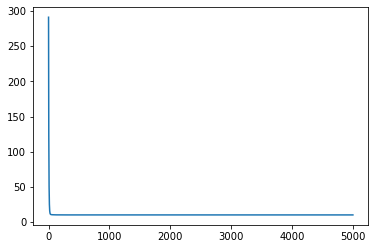

In [9]:
regressor.plot(0.1,5000)

In [10]:
regressor.rmse(X_test,y_test)

5.36303096362642

In [11]:
regressor.mape(X_test,y_test)

19.473073327886997